In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import pandas as pd
import numpy as np

def import_catalog(file):
    df = pd.read_csv(file)
    df.sort_values(by='first_arrival', inplace=True)
    df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)
    return df
    
df141 = import_catalog(file='141precision.csv')
df188 = import_catalog(file='188precision.csv')
df197 = import_catalog(file='197precision.csv')
df211 = import_catalog(file='211precision.csv')

plt.rcParams.update({'font.size': 15})


In [2]:
# also need to remove a number of columns that are simply irrelevant to the analysis or untested for a shareable dataset.

columns_to_keep = ['id', 'depth', 'relative_depth',
        'first_hydrophone', 'second_hydrophone',
       'arrival_time', 'first_arrival', 'second_arrival', 'dt',
       'max_amp', 'cum_amp', 'arrival_datetime', 'origin_time']

df141 = df141[columns_to_keep].copy()
df188 = df188[columns_to_keep].copy()
df197 = df197[columns_to_keep].copy()
df211 = df211[columns_to_keep].copy()

df141.sort_values(by='arrival_datetime', inplace=True)
# df188.sort_values(by='arrival_datetime', inplace=True)
# df197.sort_values(by='arrival_datetime', inplace=True)
# df211.sort_values(by='arrival_datetime', inplace=True)

# # removing the events with maximum amplitude <0.1 since they are false positives
df141 = df141[df141.max_amp > 0.1].copy()
df188 = df188[df188.max_amp > 0.1].copy()
df197 = df197[df197.max_amp > 0.1].copy()
df211 = df211[df211.max_amp > 0.1].copy()

df141.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df188.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df197.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df211.drop_duplicates(subset=['arrival_datetime',], inplace=True)

/localscratch/578545/ipykernel_3729077/791950160.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  cbar = ax.scatter(data['dt'], data.ones, c=c, label=label, marker='.', alpha=0.5)
/localscratch/578545/ipykernel_3729077/791950160.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  cbar = ax.scatter(data['dt'], data.ones, c=c, label=label, marker='.', alpha=0.5)
/localscratch/578545/ipykernel_3729077/791950160.py:12: User

Text(0, 0.5, 'Event Count')

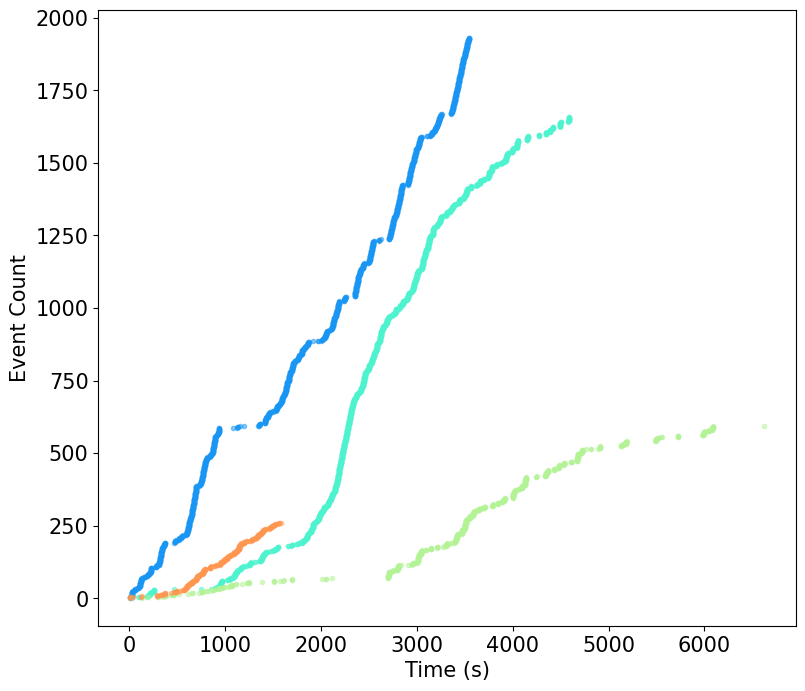

In [3]:
fig, ax = plt.subplots(figsize=(9, 8))

def make_cumcurve_with_depth(df, label, c=plt.cm.YlGnBu(0.2)):
    data = df[['arrival_datetime', 'depth']].copy()
    data.sort_values(by='arrival_datetime', inplace=True)
    data['dt'] = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).cumsum()
    data['ones'] = 1
    data['ones'] = data['ones'].cumsum()
    # data['ones'] = data['ones']/data['ones'].max()
    # cbar = ax.scatter(data['dt']/data['dt'].max(), data.ones, c=c, s=df['max_amp']*4, label=label, marker='.', alpha=0.25)
    # cbar = ax.scatter(data['dt'], data.ones, c=c, s=df['max_amp']*9, label=label, marker='.', alpha=0.5)
    cbar = ax.scatter(data['dt'], data.ones, c=c, label=label, marker='.', alpha=0.5)
    return cbar


make_cumcurve_with_depth(df141, label='Day 141, 2019',c=plt.cm.rainbow(0.2))
make_cumcurve_with_depth(df188, label='Day 188, 2019',c=plt.cm.rainbow(0.4))
make_cumcurve_with_depth(df197, label='Day 197, 2019',c=plt.cm.rainbow(0.6))
make_cumcurve_with_depth(df211, label='Day 211, 2019',c=plt.cm.rainbow(0.8))
# print(cbar)
# fig.colorbar(cbar)
# ax.legend(fontsize=15)
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'Event Count')
# ax.set_yscale('log')
# ax.set_ylim(0, 500)
# ax.set_xlim(0, 1000)

# fig.savefig('paperfigs/event_cdf_depth.pdf', bbox_inches='tight')

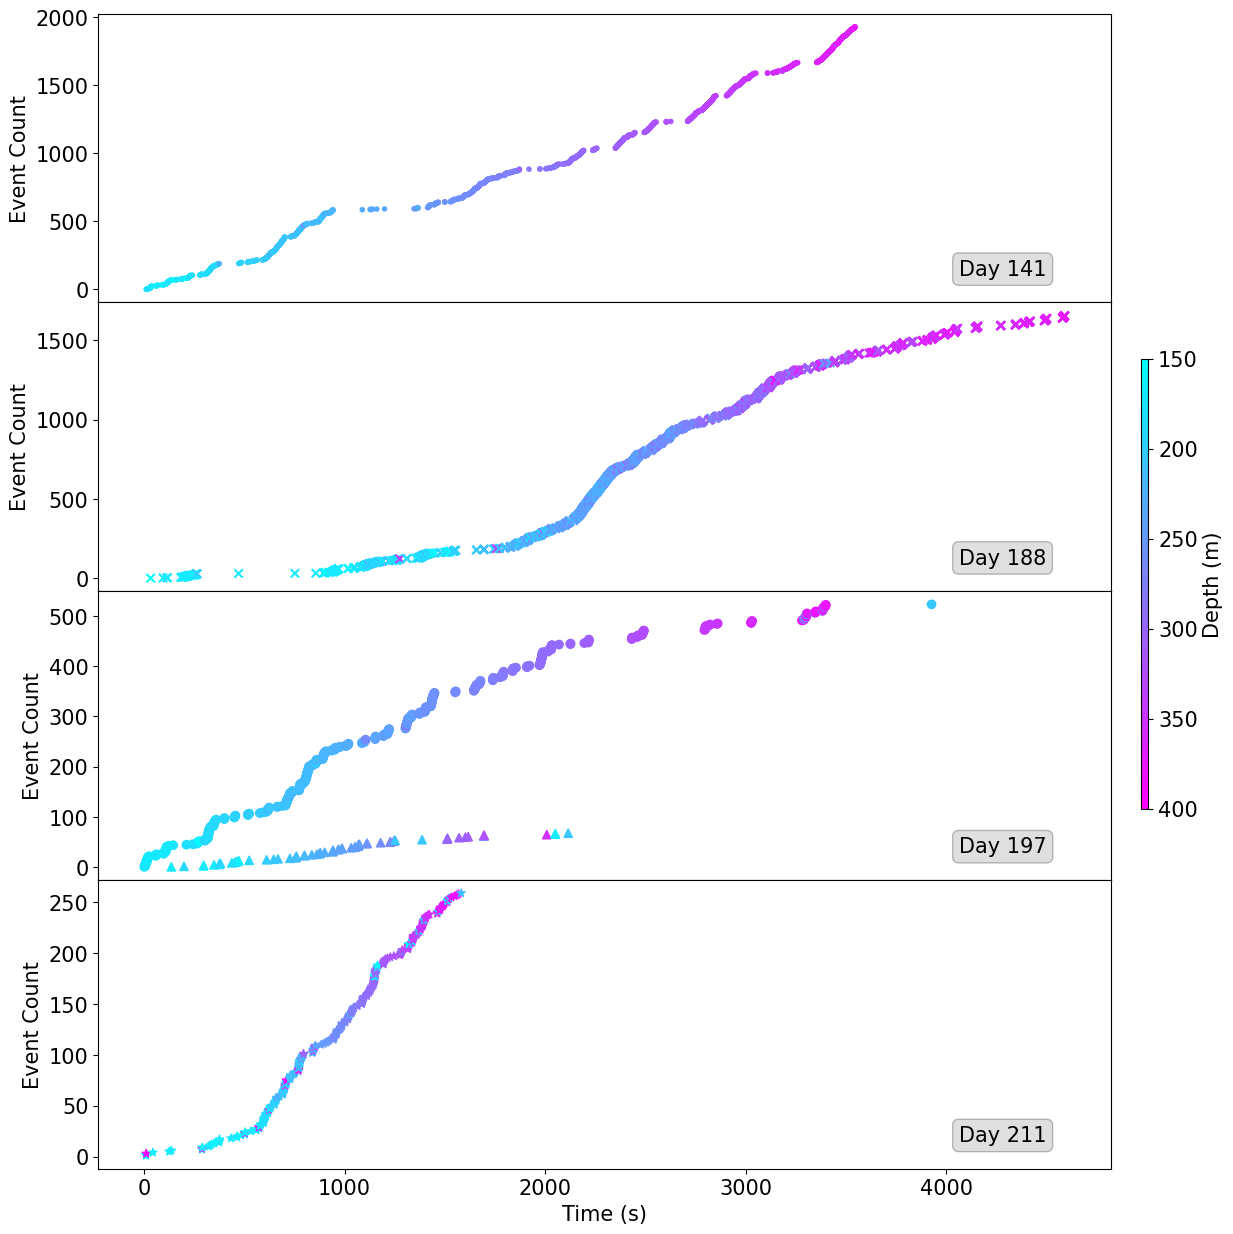

In [131]:
fig, ax = plt.subplots(4, 1, figsize=(15,15), sharex=True)

# ax[0].set_ylabel('Event count')
ax[-1].set_xlabel('Time (s)')
props = dict(boxstyle='round', facecolor='grey', alpha=0.25)

# place a text box in upper left in axes coords
ax[0].text(x=0.85, y=0.15, s='Day 141', transform=ax[0].transAxes, verticalalignment='top', bbox=props)
ax[1].text(x=0.85, y=0.15, s='Day 188', transform=ax[1].transAxes, verticalalignment='top', bbox=props)
ax[2].text(x=0.85, y=0.15, s='Day 197', transform=ax[2].transAxes, verticalalignment='top', bbox=props)
ax[3].text(x=0.85, y=0.15, s='Day 211', transform=ax[3].transAxes, verticalalignment='top', bbox=props)


def plot_events(df, label, marker, ax):
    data = df.copy()
    data.sort_values(by='arrival_datetime', inplace=True)
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).cumsum()
    y = np.arange(0, data.shape[0])
    c = data['depth']
    ax.set_ylabel('Event Count')
    return ax.scatter(x, y, c=c, label=label, cmap=plt.cm.cool, vmin=150, vmax=400
                     ,marker=marker)

cbar = plot_events(df=df141, label='Day 141', marker='.', ax=ax[0])
cbar = plot_events(df=df188, label='Day 188', marker='x', ax=ax[1])

cbar = plot_events(df=df197.iloc[0:69], label='Day 197 (swarm 1)', marker='^', ax=ax[2])
cbar = plot_events(df=df197.iloc[69:], label='Day 197 (swarm 2)', marker='o', ax=ax[2])

cbar = plot_events(df=df211, label='Day 211', marker='*', ax=ax[3])


fig.subplots_adjust(right=0.8, hspace=0.0)
# [left, bottom, width, height] 
cbar_ax = fig.add_axes([0.82, 0.35, 0.005, 0.3])
fig.colorbar(cbar, cax=cbar_ax, shrink=0.5, label='Depth (m)')

cbar_ax.invert_yaxis()

fig.savefig('fig5.pdf', bbox_inches='tight')

<Axes: xlabel='arrival_datetime'>

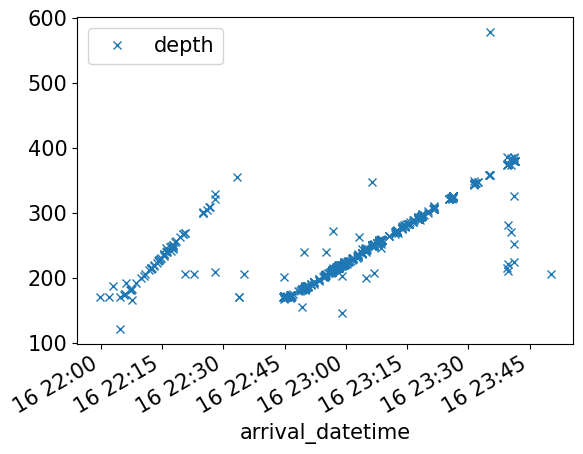

In [61]:
df197.plot('arrival_datetime', 'depth', linestyle='', marker='x')

In [65]:
df197.dtypes

id                                 int64
depth                            float64
relative_depth                   float64
first_hydrophone                   int64
second_hydrophone                  int64
arrival_time                     float64
first_arrival                     object
second_arrival                    object
dt                               float64
max_amp                          float64
cum_amp                          float64
arrival_datetime     datetime64[ns, UTC]
origin_time                       object
dtype: object

In [80]:
df197['arrival_time'] = pd.to_datetime(df197['arrival_time'])

In [81]:
df197.dtypes

id                                 int64
depth                            float64
relative_depth                   float64
first_hydrophone                   int64
second_hydrophone                  int64
arrival_time              datetime64[ns]
first_arrival                     object
second_arrival                    object
dt                               float64
max_amp                          float64
cum_amp                          float64
arrival_datetime     datetime64[ns, UTC]
origin_time                       object
datetime                  datetime64[ns]
dtype: object

In [82]:
df197.loc[df197.arrival_time < np.datetime64('2019-07-16 22:40:00.00')]

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time,datetime
0,0,170.000000,0.000000,2,3,1970-01-01 00:00:00.000018093,2019-07-16 21:59:46.184000+00:00,2019-07-16 21:59:46.224000+00:00,-0.040000,0.647819,2.319671,2019-07-16 21:59:46.184000+00:00,2019-07-16T21:59:46.184000Z,1970-01-01 00:00:00.000018093
1,1,170.000000,0.000000,2,3,1970-01-01 00:00:00.000018093,2019-07-16 22:02:02.188000+00:00,2019-07-16 22:02:02.228000+00:00,-0.040000,0.312422,1.668624,2019-07-16 22:02:02.188000+00:00,2019-07-16T22:02:02.188000Z,1970-01-01 00:00:00.000018093
4,4,186.627625,16.627625,2,5,1970-01-01 00:00:00.000018093,2019-07-16 22:03:05.322000+00:00,2019-07-16 22:03:05.328999+00:00,-0.006999,0.286188,0.889102,2019-07-16 22:03:05.322000+00:00,2019-07-16T22:03:05.312498Z,1970-01-01 00:00:00.000018093
5,5,121.002625,-48.997375,2,5,1970-01-01 00:00:00.000018093,2019-07-16 22:04:42.920000+00:00,2019-07-16 22:04:42.951999+00:00,-0.031999,1.550868,7.708162,2019-07-16 22:04:42.920000+00:00,2019-07-16T22:04:42.947998Z,1970-01-01 00:00:00.000018093
6,6,170.875000,0.875000,2,3,1970-01-01 00:00:00.000018093,2019-07-16 22:04:43.470000+00:00,2019-07-16 22:04:43.509000+00:00,-0.039000,1.080984,5.756559,2019-07-16 22:04:43.470000+00:00,2019-07-16T22:04:43.469500Z,1970-01-01 00:00:00.000018093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,920,379.125875,69.125875,5,4,1970-01-01 00:00:00.000018093,2019-07-16 23:41:17.133999+00:00,2019-07-16 23:41:17.173000+00:00,-0.039001,4.804053,21.679757,2019-07-16 23:41:17.133999+00:00,2019-07-16T23:41:17.094498Z,1970-01-01 00:00:00.000018093
1051,1051,380.000875,70.000875,5,4,1970-01-01 00:00:00.000018093,2019-07-16 23:41:18.632999+00:00,2019-07-16 23:41:18.673000+00:00,-0.040001,3.276521,14.035152,2019-07-16 23:41:18.632999+00:00,2019-07-16T23:41:18.592998Z,1970-01-01 00:00:00.000018093
1052,1052,380.000875,70.000875,5,4,1970-01-01 00:00:00.000018093,2019-07-16 23:41:19.562999+00:00,2019-07-16 23:41:19.603000+00:00,-0.040001,9.898757,29.881379,2019-07-16 23:41:19.562999+00:00,2019-07-16T23:41:19.522998Z,1970-01-01 00:00:00.000018093
1053,1053,380.000875,70.000875,5,4,1970-01-01 00:00:00.000018093,2019-07-16 23:41:20.301999+00:00,2019-07-16 23:41:20.342000+00:00,-0.040001,24.455707,107.878744,2019-07-16 23:41:20.301999+00:00,2019-07-16T23:41:20.261998Z,1970-01-01 00:00:00.000018093
